https://www.kaggle.com/rmisra/news-category-dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
import pickle

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [6]:
pd.options.display.max_colwidth = -1

## Import Data

In [7]:
data = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [8]:
data.shape

(200853, 6)

In [9]:
data.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


## EDA

### Dropping Irrelvant Data

In [10]:
data = data.drop(['authors', 'date'], axis=1)

In [11]:
data.head()

,category,headline,link,short_description
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


### News Categories and their counts

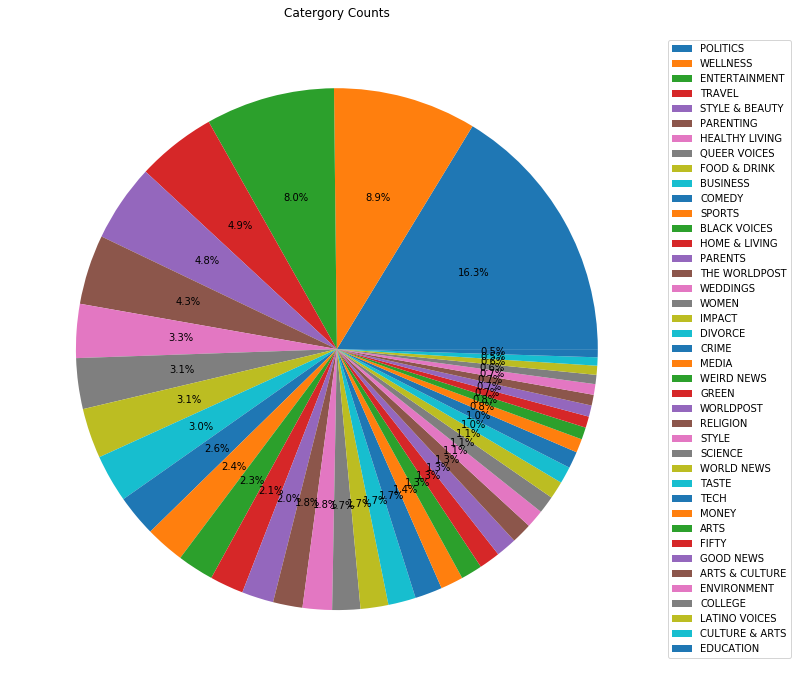

In [12]:
plotdata = data['category'].value_counts()

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

ax.pie(plotdata, autopct='%1.1f%%')

ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Catergory Counts")

plt.show()

### Generalising the categories

In [13]:
print(plotdata.index,len(plotdata.index))

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING',
       'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'IMPACT', 'DIVORCE',
       'CRIME', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION',
       'STYLE', 'SCIENCE', 'WORLD NEWS', 'TASTE', 'TECH', 'MONEY', 'ARTS',
       'FIFTY', 'GOOD NEWS', 'ARTS & CULTURE', 'ENVIRONMENT', 'COLLEGE',
       'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'],
      dtype='object') 41


In [14]:
def generalize(x):
    if x in ['BUSINESS', 'MONEY']:
        return 'BUSINESS'
    if x in ['SCIENCE', 'TECH', 'ARTS', 'ARTS & CULTURE', 'COLLEGE', 'CULTURE & ARTS', 'EDUCATION']:
        return 'EDUCATION'
    if x in ['WELLNESS', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'HOME & LIVING', 'FOOD & DRINK', 'PARENTS', 'WEDDINGS', 'WOMEN', 'DIVORCE', 'RELIGION', 'STYLE', 'TASTE', 'FIFTY']:
        return 'LIFESTYLE'
    if x in ['QUEER VOICES', 'BLACK VOICES', 'THE WORLDPOST', 'WORLDPOST', 'WORLD NEWS', 'LATINO VOICES', 'IMPACT', 'MEDIA']:
        return 'GLOBAL'
    if x in ['COMEDY', 'CRIME', 'WEIRD NEWS', 'GREEN', 'GOOD NEWS', 'ENVIRONMENT']:
        return 'MISCELLANEOUS'
    else:
        return x

In [15]:
data['category'] = data['category'].apply(generalize)

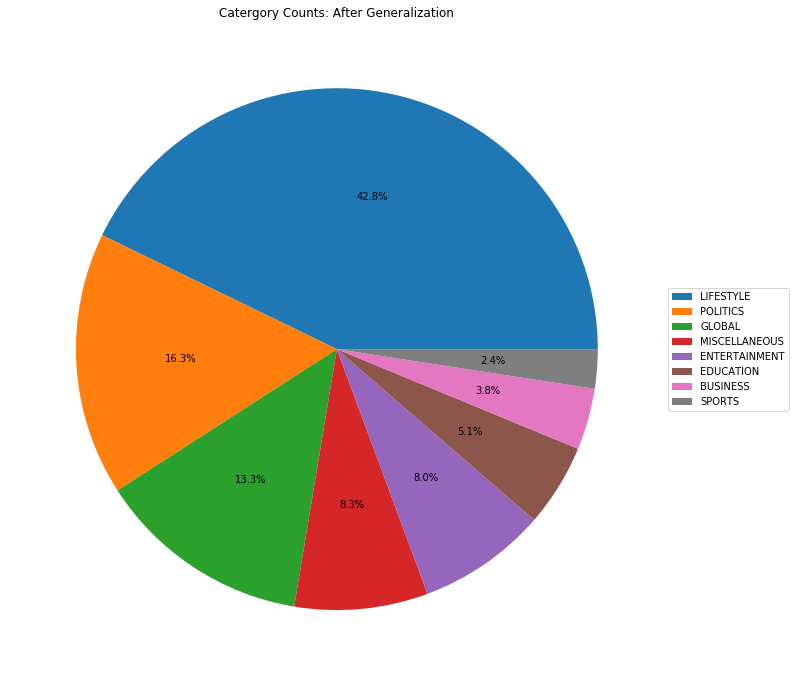

In [16]:
plotdata = data['category'].value_counts()

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

ax.pie(plotdata, autopct='%1.1f%%')

ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Catergory Counts: After Generalization")

plt.show()

In [17]:
print(plotdata.index,len(plotdata.index))

Index(['LIFESTYLE', 'POLITICS', 'GLOBAL', 'MISCELLANEOUS', 'ENTERTAINMENT',
       'EDUCATION', 'BUSINESS', 'SPORTS'],
      dtype='object') 8


In [18]:
print(plotdata)

LIFESTYLE        85984
POLITICS         32739
GLOBAL           26665
MISCELLANEOUS    16593
ENTERTAINMENT    16058
EDUCATION        10286
BUSINESS         7644 
SPORTS           4884 
Name: category, dtype: int64


### Visualizing most common words

In [19]:
data['article'] = data['headline'] + ' ' + data['short_description']

In [20]:
# def df2corpus(df):
#     corpus = ''
#     for x in df:
#         corpus += str(x) + '\n'
#     return corpus

In [21]:
# stopwords = set(STOPWORDS)
# def buildWordCloud(x):
#     wordcloud = WordCloud(width = 6000, height = 6000, 
#                           background_color ='black', stopwords = stopwords, min_font_size = 10, 
#                           max_words = 20).generate(df2corpus(data[data['category'] == x]['article']))
#     print(x)
#     plt.figure(figsize = (10, 10), facecolor = None)
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.tight_layout(pad = 0)
#     plt.show()

In [22]:
# @interact
# def mostcommonwords(category = plotdata.index):
#     buildWordCloud(category)

### Text Cleaning

In [23]:
remove_punc = lambda x : re.sub(r"\W", ' ', x)

remove_num = lambda x : re.sub(r"\d+", ' ', x)

remove_extra_spaces = lambda x : re.sub(r"\s+", ' ', x)

lower_case = lambda x : x.lower()

stop_words = set(nltk.corpus.stopwords.words('english'))
remove_stopwords = lambda x: ' '.join(word for word in x.split() if word not in stop_words)

ps = PorterStemmer()
ps_stem = lambda x: ' '.join(ps.stem(word) for word in x.split())

wnl = WordNetLemmatizer()
wnl_lemmatize = lambda x: ' '.join(wnl.lemmatize(word) for word in x.split())

def tag_pos(x):
    tag_list =  nltk.pos_tag(nltk.word_tokenize(x))
    pos = ""
    for t in tag_list:
        pos += t[0] +'(' + t[1] +')' + ' '
    return pos

def cleanText(x, rsw, stm, lem, tgps):
    x = remove_punc(x)
    x = remove_num(x)
    x = remove_extra_spaces(x)
    x = lower_case(x)
    if rsw:
        x = remove_stopwords(x)
    if stm:
        x = ps_stem(x)
    if lem:
        x = wnl_lemmatize(x)
    if tgps:
        x = tag_pos(x)
    return x

In [24]:
data['article_clean'] = data['article'].apply(lambda x : cleanText(x, True, False, True, True))

In [25]:
data.head()

,category,headline,link,short_description,article,article_clean
0,MISCELLANEOUS,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.",mass(NN) shooting(VBG) texas(NN) last(JJ) week(NN) tv(NN) left(VBD) husband(NN) killed(VBN) child(JJ) another(DT) day(NN) america(VB)
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.,smith(NN) join(NN) diplo(JJ) nicky(JJ) jam(NN) world(NN) cup(NN) official(NN) song(NN) course(NN) song(NN)
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,hugh(NN) grant(NN) marries(NNS) first(JJ) time(NN) age(NN) actor(NN) longtime(JJ) girlfriend(NN) anna(NN) eberstein(RB) tied(VBN) knot(NN) civil(JJ) ceremony(NN)
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,jim(NN) carrey(NN) blast(NN) castrato(NN) adam(NN) schiff(NN) democrat(VBD) new(JJ) artwork(NN) actor(NN) give(VBP) dems(NNS) as(IN) kicking(VBG) fighting(VBG) hard(JJ) enough(RB) donald(JJ) trump(NN)
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""","Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",julianna(NN) margulies(NNS) us(PRP) donald(VBP) trump(JJ) poop(NN) bag(NN) pick(NN) dog(NN) dietland(NN) actress(NN) said(VBD) using(VBG) bag(NN) really(RB) cathartic(JJ) therapeutic(JJ) moment(NN)


In [10]:
data = data.drop(['headline', 'link', 'short_description', 'article'], axis=1)

In [11]:
data.head()

,category,article_clean
0,MISCELLANEOUS,mass(NN) shooting(VBG) texas(NN) last(JJ) week(NN) tv(NN) left(VBD) husband(NN) killed(VBN) child(JJ) another(DT) day(NN) america(VB)
1,ENTERTAINMENT,smith(NN) join(NN) diplo(JJ) nicky(JJ) jam(NN) world(NN) cup(NN) official(NN) song(NN) course(NN) song(NN)
2,ENTERTAINMENT,hugh(NN) grant(NN) marries(NNS) first(JJ) time(NN) age(NN) actor(NN) longtime(JJ) girlfriend(NN) anna(NN) eberstein(RB) tied(VBN) knot(NN) civil(JJ) ceremony(NN)
3,ENTERTAINMENT,jim(NN) carrey(NN) blast(NN) castrato(NN) adam(NN) schiff(NN) democrat(VBD) new(JJ) artwork(NN) actor(NN) give(VBP) dems(NNS) as(IN) kicking(VBG) fighting(VBG) hard(JJ) enough(RB) donald(JJ) trump(NN)
4,ENTERTAINMENT,julianna(NN) margulies(NNS) us(PRP) donald(VBP) trump(JJ) poop(NN) bag(NN) pick(NN) dog(NN) dietland(NN) actress(NN) said(VBD) using(VBG) bag(NN) really(RB) cathartic(JJ) therapeutic(JJ) moment(NN)


In [12]:
data.to_csv('json_cleaned.csv', index=False)

In [7]:
data = pd.read_csv('json_cleaned.csv')

In [8]:
data['article_clean'] = data['article_clean'].apply(str)

In [9]:
Y = pd.get_dummies(data['category'])

## Baseline Model

### TFIDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data['article_clean'])
X_vect = vectorizer.transform(data['article_clean'])

In [ ]:
pickle.dump(vectorizer, open('Tvect', 'wb'))

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model_accuracies = pd.DataFrame()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
accuracy_means = []
for y in Y.columns:
    model = LogisticRegression()
    scores = cross_val_score(model, X_vect, Y[y], cv=10)
    print('Accuracy: %0.2f (+/- %0.2f)' %(scores.mean(), scores.std()))
    accuracy_means.append(scores.mean())
model_accuracies['LR'] = accuracy_means

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.97 (+/- 0.00)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.95 (+/- 0.00)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.94 (+/- 0.00)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.90 (+/- 0.01)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.86 (+/- 0.04)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.93 (+/- 0.00)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.91 (+/- 0.03)


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.98 (+/- 0.00)


#### Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
accuracy_means = []
for y in Y.columns:
    model = MultinomialNB()
    scores = cross_val_score(model, X_vect, Y[y], cv=10)
    print('Accuracy: %0.2f (+/- %0.2f)' %(scores.mean(), scores.std()))
    accuracy_means.append(scores.mean())
model_accuracies['MNB'] = accuracy_means

Accuracy: 0.96 (+/- 0.00)
Accuracy: 0.95 (+/- 0.00)
Accuracy: 0.92 (+/- 0.00)
Accuracy: 0.88 (+/- 0.00)
Accuracy: 0.85 (+/- 0.04)
Accuracy: 0.92 (+/- 0.00)
Accuracy: 0.89 (+/- 0.01)
Accuracy: 0.98 (+/- 0.00)


### Model Comparison

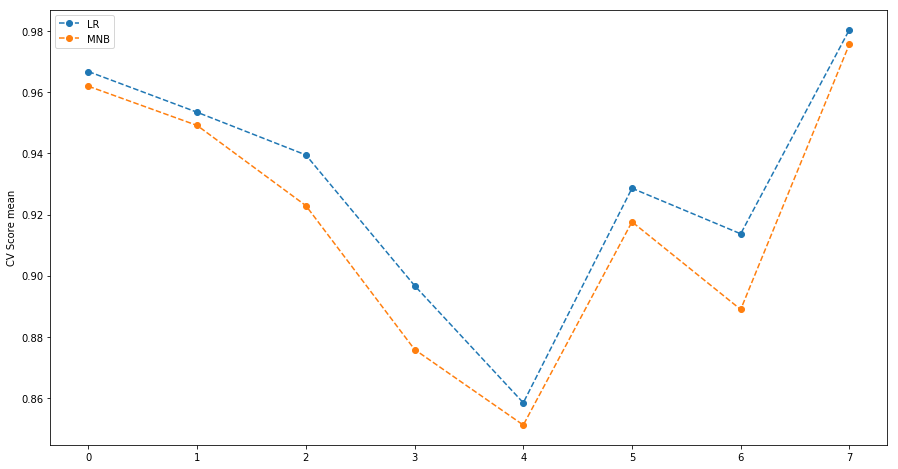

In [ ]:
plt.figure(1, figsize=(15, 8))
for x in model_accuracies:
    plt.plot(model_accuracies[x], '--o',label=x)
plt.ylabel('CV Score mean')    
plt.legend()
plt.show()

## Model Training

### Logistic Regression

In [ ]:
lr01 = LogisticRegression()
lr01.fit(X_vect, Y['LIFESTYLE'])

lr02 = LogisticRegression()
lr02.fit(X_vect, Y['POLITICS'])

lr03 = LogisticRegression()
lr03.fit(X_vect, Y['GLOBAL'])

lr04 = LogisticRegression()
lr04.fit(X_vect, Y['MISCELLANEOUS'])

lr05 = LogisticRegression()
lr05.fit(X_vect, Y['ENTERTAINMENT'])

lr06 = LogisticRegression()
lr06.fit(X_vect, Y['EDUCATION'])

lr07 = LogisticRegression()
lr07.fit(X_vect, Y['BUSINESS'])

lr08 = LogisticRegression()
lr08.fit(X_vect, Y['SPORTS'])

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

pickle.dump(lr01, open('lifestyleLR.pickle', 'wb'))
pickle.dump(lr02, open('politicsLR.pickle', 'wb'))
pickle.dump(lr03, open('globalLR.pickle', 'wb'))
pickle.dump(lr04, open('miscellaneousLR.pickle', 'wb'))
pickle.dump(lr05, open('entertainmentLR.pickle', 'wb'))
pickle.dump(lr06, open('educationLR.pickle', 'wb'))
pickle.dump(lr07, open('businessLR.pickle', 'wb'))
pickle.dump(lr08, open('sportsLR.pickle', 'wb'))

### Multinomial NB

In [ ]:
mnb01 = MultinomialNB()
mnb01.fit(X_vect, Y['LIFESTYLE'])

mnb02 = MultinomialNB()
mnb02.fit(X_vect, Y['POLITICS'])

mnb03 = MultinomialNB()
mnb03.fit(X_vect, Y['GLOBAL'])

mnb04 = MultinomialNB()
mnb04.fit(X_vect, Y['MISCELLANEOUS'])

mnb05 = MultinomialNB()
mnb05.fit(X_vect, Y['ENTERTAINMENT'])

mnb06 = MultinomialNB()
mnb06.fit(X_vect, Y['EDUCATION'])

mnb07 = MultinomialNB()
mnb07.fit(X_vect, Y['BUSINESS'])

mnb08 = MultinomialNB()
mnb08.fit(X_vect, Y['SPORTS'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

pickle.dump(mnb01, open('lifestyleMNB.pickle', 'wb'))
pickle.dump(mnb02, open('politicsMNB.pickle', 'wb'))
pickle.dump(mnb03, open('globalMNB.pickle', 'wb'))
pickle.dump(mnb04, open('miscellaneousMNB.pickle', 'wb'))
pickle.dump(mnb05, open('entertainmentMNB.pickle', 'wb'))
pickle.dump(mnb06, open('educationMNB.pickle', 'wb'))
pickle.dump(mnb07, open('businessMNB.pickle', 'wb'))
pickle.dump(mnb08, open('sportsMNB.pickle', 'wb'))

## Predictions

In [ ]:
def classify(news):
    news_clean = cleanText(news, True, False, True, True)
    news_vect = vectorizer.transform([news_clean])
    lrpred = []
    if lr01.predict(news_vect):
        lrpred.append('LIFESTYLE')
    if lr02.predict(news_vect):
        lrpred.append('POLITICS')
    if lr03.predict(news_vect):
        lrpred.append('GLOBAL')
    if lr04.predict(news_vect):
        lrpred.append('MISCELLANEOUS')
    if lr05.predict(news_vect):
        lrpred.append('ENTERTAINMENT')
    if lr06.predict(news_vect):
        lrpred.append('EDUCATION')
    if lr07.predict(news_vect):
        lrpred.append('BUSINESS')
    if lr08.predict(news_vect):
        lrpred.append('SPORTS')
    mnbpred = []
    if mnb01.predict(news_vect):
        mnbpred.append('LIFESTYLE')
    if mnb02.predict(news_vect):
        mnbpred.append('POLITICS')
    if mnb03.predict(news_vect):
        mnbpred.append('GLOBAL')
    if mnb04.predict(news_vect):
        mnbpred.append('MISCELLANEOUS')
    if mnb05.predict(news_vect):
        mnbpred.append('ENTERTAINMENT')
    if mnb06.predict(news_vect):
        mnbpred.append('EDUCATION')
    if mnb07.predict(news_vect):
        mnbpred.append('BUSINESS')
    if mnb08.predict(news_vect):
        mnbpred.append('SPORTS')
    return lrpred, mnbpred

In [ ]:
def interpret(classification):
    print('Tags identified by Logistic Regression:')
    for x in classification[0]:
        print(x)
    print()
    print('Tags identified by MultinomialNB:')
    for x in classification[1]:
        print(x)
    print()
    print('Common Tags:')
    for x in set(classification[0])&set(classification[1]):
        print(x)
    print()
    print('All Tags:')
    for x in set(classification[0])|set(classification[1]):
        print(x)

In [10]:
test_news = [
    "No alliance with AAP in Haryana and Punjab, Congress confirms",
    "Online travel game show 'Knock Knock' goes live on MakeMyTrip app",
    "Female fan threatens to kill Varun's girlfriend outside his house",
    "Longest year of our life: Irrfan's wife after his cancer treatment",
    "Joseph breaks all-time IPL record set by Pakistan's Tanvir in 2008",
    "EC bans BJP's theme song composed by Babul Supriyo",
    "Dhoni gets angry at Chahar for no-balls, bowler responds with wicket",
    "MI defeat SRH as debutant Joseph records best IPL bowling figures",
    "Pulwama attack convinced world Pak exporting terror to India: PM Modi",
    "FB visits Delhi man's home for political post's verification: Report",
    "NZ family finds hidden camera in Airbnb room, company apologises",
    "Cong spokesman attacks BJP counterpart over traitor remark on TV",
    "Drunk father fed alcohol in milk bottle to daughter, 3-yr-old rescued",
    "IT officials raid houses of MP CM Kamal Nath's close aides",
    "I once withdrew $10 million just to look at it: Africa's richest man"
]

In [ ]:
test_results = pd.DataFrame(columns=['news', 'lr', 'mnb', 'common', 'all'])
for i in range(len(test_news)):
    x = classify(test_news[i])
    test_results.loc[i] = [test_news[i], x[0], x[1], set(x[0])&set(x[1]), set(x[0])|set(x[1])]

In [ ]:
test_results

## LSTM

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [12]:
vocabulary_size = 8192
pad_length = 256
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(data['article_clean'])
sequences = tokenizer.texts_to_sequences(data['article_clean'])
padded_sequences = pad_sequences(sequences, maxlen=pad_length)

es = EarlyStopping(monitor='loss', mode='min', verbose=1)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
def build_lstm(vocabulary_size, pad_length):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 1024, input_length=pad_length))
    model.add(LSTM(1024, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(8, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = build_lstm(vocabulary_size, pad_length)


model.fit(padded_sequences, Y, validation_split=0.3, epochs=25, 
           callbacks=[es, ckpt])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 1024)         8388608   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 8200      
Total params: 16,789,512
Trainable params: 16,789,512
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 140597 samples, validate on 60256 samples
Epoch 1/25
140597/140597 [==============================] - 36870s 262ms/step - loss: 0.2211 - acc: 0.9168 -

In [13]:
from keras.models import load_model

In [ ]:
new_model = load_model("model.h5")
new_model.fit(padded_sequences, Y, validation_split=0.3, epochs=25, callbacks=[es, ckpt])

Train on 140597 samples, validate on 60256 samples
Epoch 1/25
140597/140597 [==============================] - 36673s 261ms/step - loss: 0.1518 - acc: 0.9408 - val_loss: 0.1367 - val_acc: 0.9495

Epoch 00001: loss improved from inf to 0.15183, saving model to model.h5
Epoch 2/25
  2656/140597 [..............................] - ETA: 8:55:40 - loss: 0.1203 - acc: 0.9535

In [ ]:
new_model = load_model("model.h5")
new_model.fit(padded_sequences, Y, validation_split=0.3, epochs=25, callbacks=[es, ckpt])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 140597 samples, validate on 60256 samples
Epoch 1/25
140597/140597 [==============================] - 34264s 244ms/step - loss: 0.1366 - acc: 0.9467 - val_loss: 0.1407 - val_acc: 0.9484

Epoch 00001: loss improved from inf to 0.13662, saving model to model.h5
Epoch 2/25
    64/140597 [..............................] - ETA: 8:56:52 - loss: 0.1163 - acc: 0.9512

In [14]:
new_model = load_model("model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [15]:
preds = new_model.predict(pad_sequences(tokenizer.texts_to_sequences(test_news), maxlen=pad_length))

In [19]:
def interpreted_lstm_pred(pred):
    labels = [
        'LIFESTYLE',
        'POLITICS',
        'GLOBAL',
        'MISCELLANEOUS',
        'ENTERTAINMENT',
        'EDUCATION',
        'BUSINESS',
        'SPORTS'
    ]
    identified = []
    for i, p in enumerate(pred):
        if p > 0.5:
            identified.append(labels[i])
    return identified

In [20]:
preds_ = []
for pred in preds:
    preds_.append(interpreted_lstm_pred(pred))

In [22]:
pd.DataFrame({'News': test_news, 'Tags':preds_})

,News,Tags
0,"No alliance with AAP in Haryana and Punjab, Congress confirms",[BUSINESS]
1,Online travel game show 'Knock Knock' goes live on MakeMyTrip app,[ENTERTAINMENT]
2,Female fan threatens to kill Varun's girlfriend outside his house,[]
3,Longest year of our life: Irrfan's wife after his cancer treatment,[ENTERTAINMENT]
4,Joseph breaks all-time IPL record set by Pakistan's Tanvir in 2008,[]
5,EC bans BJP's theme song composed by Babul Supriyo,[]
6,"Dhoni gets angry at Chahar for no-balls, bowler responds with wicket",[]
7,MI defeat SRH as debutant Joseph records best IPL bowling figures,[]
8,Pulwama attack convinced world Pak exporting terror to India: PM Modi,[MISCELLANEOUS]
9,FB visits Delhi man's home for political post's verification: Report,[EDUCATION]
